In [7]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
house=pd.read_csv(r"/media/amit/Work/GitHub/ML with Python Training/DataSets/Housing.csv")

In [9]:
house.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [10]:
house.isnull().sum()

Unnamed: 0    0
price         0
lotsize       0
bedrooms      0
bathrms       0
stories       0
driveway      0
recroom       0
fullbase      0
gashw         0
airco         0
garagepl      0
prefarea      0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lc=LabelEncoder()

In [13]:
house['driveway']=lc.fit_transform(house['driveway'])

In [14]:
house.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,1,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,1,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,1,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,1,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,1,no,no,no,no,0,no


In [15]:
#get_dummies
newrecroom=pd.get_dummies(house['recroom'])
newrecroom

,no,yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,1,0
8,0,1
9,0,1


In [16]:
house=pd.concat([house,newrecroom],axis=1)

In [17]:
house.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,no,yes
0,1,42000.0,5850,3,1,2,1,no,yes,no,no,1,no,1,0
1,2,38500.0,4000,2,1,1,1,no,no,no,no,0,no,1,0
2,3,49500.0,3060,3,1,1,1,no,no,no,no,0,no,1,0
3,4,60500.0,6650,3,1,2,1,yes,no,no,no,0,no,0,1
4,5,61000.0,6360,2,1,1,1,no,no,no,no,0,no,1,0


In [18]:
#standarization
x=house.iloc[:,2:3]

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()

In [21]:
stdsc=sc.fit_transform(x)
stdsc

array([[ 3.23028055e-01],
       [-5.31012956e-01],
       [-9.64958118e-01],
       [ 6.92343087e-01],
       [ 5.58466388e-01],
       [-4.57149950e-01],
       [-5.86410211e-01],
       [-4.57149950e-01],
       [-1.61697924e-01],
       [ 1.61452729e-01],
       [ 9.46247171e-01],
       [-9.92656746e-01],
       [-1.59279367e+00],
       [-1.04805400e+00],
       [-7.15670472e-01],
       [-9.07252645e-01],
       [-8.54163609e-01],
       [ 2.29595918e-02],
       [-7.84917040e-01],
       [-5.37475969e-01],
       [-1.68622581e-01],
       [-2.95574623e-01],
       [-5.31012956e-01],
       [-5.61481446e-01],
       [-8.78349178e-02],
       [-9.92656746e-01],
       [-6.23341714e-01],
       [-8.78349178e-02],
       [-9.92656746e-01],
       [-3.00191061e-01],
       [-7.61834851e-01],
       [-7.61834851e-01],
       [-5.31012956e-01],
       [-3.00191061e-01],
       [ 5.58466388e-01],
       [-3.00191061e-01],
       [-5.16240355e-01],
       [ 9.11027809e-03],
       [ 1.1

In [22]:
house['stdlotsize']=stdsc

In [23]:
house.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,no,yes,stdlotsize
0,1,42000.0,5850,3,1,2,1,no,yes,no,no,1,no,1,0,0.323028
1,2,38500.0,4000,2,1,1,1,no,no,no,no,0,no,1,0,-0.531013
2,3,49500.0,3060,3,1,1,1,no,no,no,no,0,no,1,0,-0.964958
3,4,60500.0,6650,3,1,2,1,yes,no,no,no,0,no,0,1,0.692343
4,5,61000.0,6360,2,1,1,1,no,no,no,no,0,no,1,0,0.558466


In [24]:
house['recroom']=lc.fit_transform(house['recroom'])
house['fullbase']=lc.fit_transform(house['fullbase'])
house['gashw']=lc.fit_transform(house['gashw'])
house['airco']=lc.fit_transform(house['airco'])
house['prefarea']=lc.fit_transform(house['prefarea'])

In [25]:
house.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,no,yes,stdlotsize
0,1,42000.0,5850,3,1,2,1,0,1,0,0,1,0,1,0,0.323028
1,2,38500.0,4000,2,1,1,1,0,0,0,0,0,0,1,0,-0.531013
2,3,49500.0,3060,3,1,1,1,0,0,0,0,0,0,1,0,-0.964958
3,4,60500.0,6650,3,1,2,1,1,0,0,0,0,0,0,1,0.692343
4,5,61000.0,6360,2,1,1,1,0,0,0,0,0,0,1,0,0.558466


In [26]:
house.isnull().sum()

Unnamed: 0    0
price         0
lotsize       0
bedrooms      0
bathrms       0
stories       0
driveway      0
recroom       0
fullbase      0
gashw         0
airco         0
garagepl      0
prefarea      0
no            0
yes           0
stdlotsize    0
dtype: int64

In [27]:
#check for multicorlinearity
house0=house.iloc[:,1:12]
c=house0.corr()
c

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.122499,0.042281,-0.173860,0.018261,0.296216,0.043412
driveway,0.297167,0.288778,-0.011996,0.041955,0.122499,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682
recroom,0.254960,0.140327,0.080492,0.126892,0.042281,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122
fullbase,0.186218,0.047487,0.097201,0.102791,-0.173860,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524
gashw,0.092837,-0.009201,0.046028,0.067365,0.018261,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144
airco,0.453347,0.221765,0.160412,0.184955,0.296216,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596


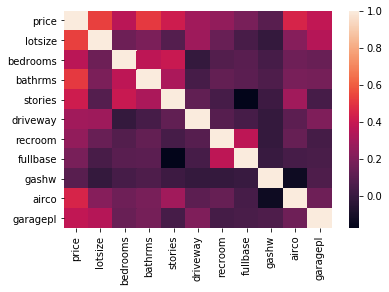

In [29]:
sns.heatmap(c)sns.heatmap(c)

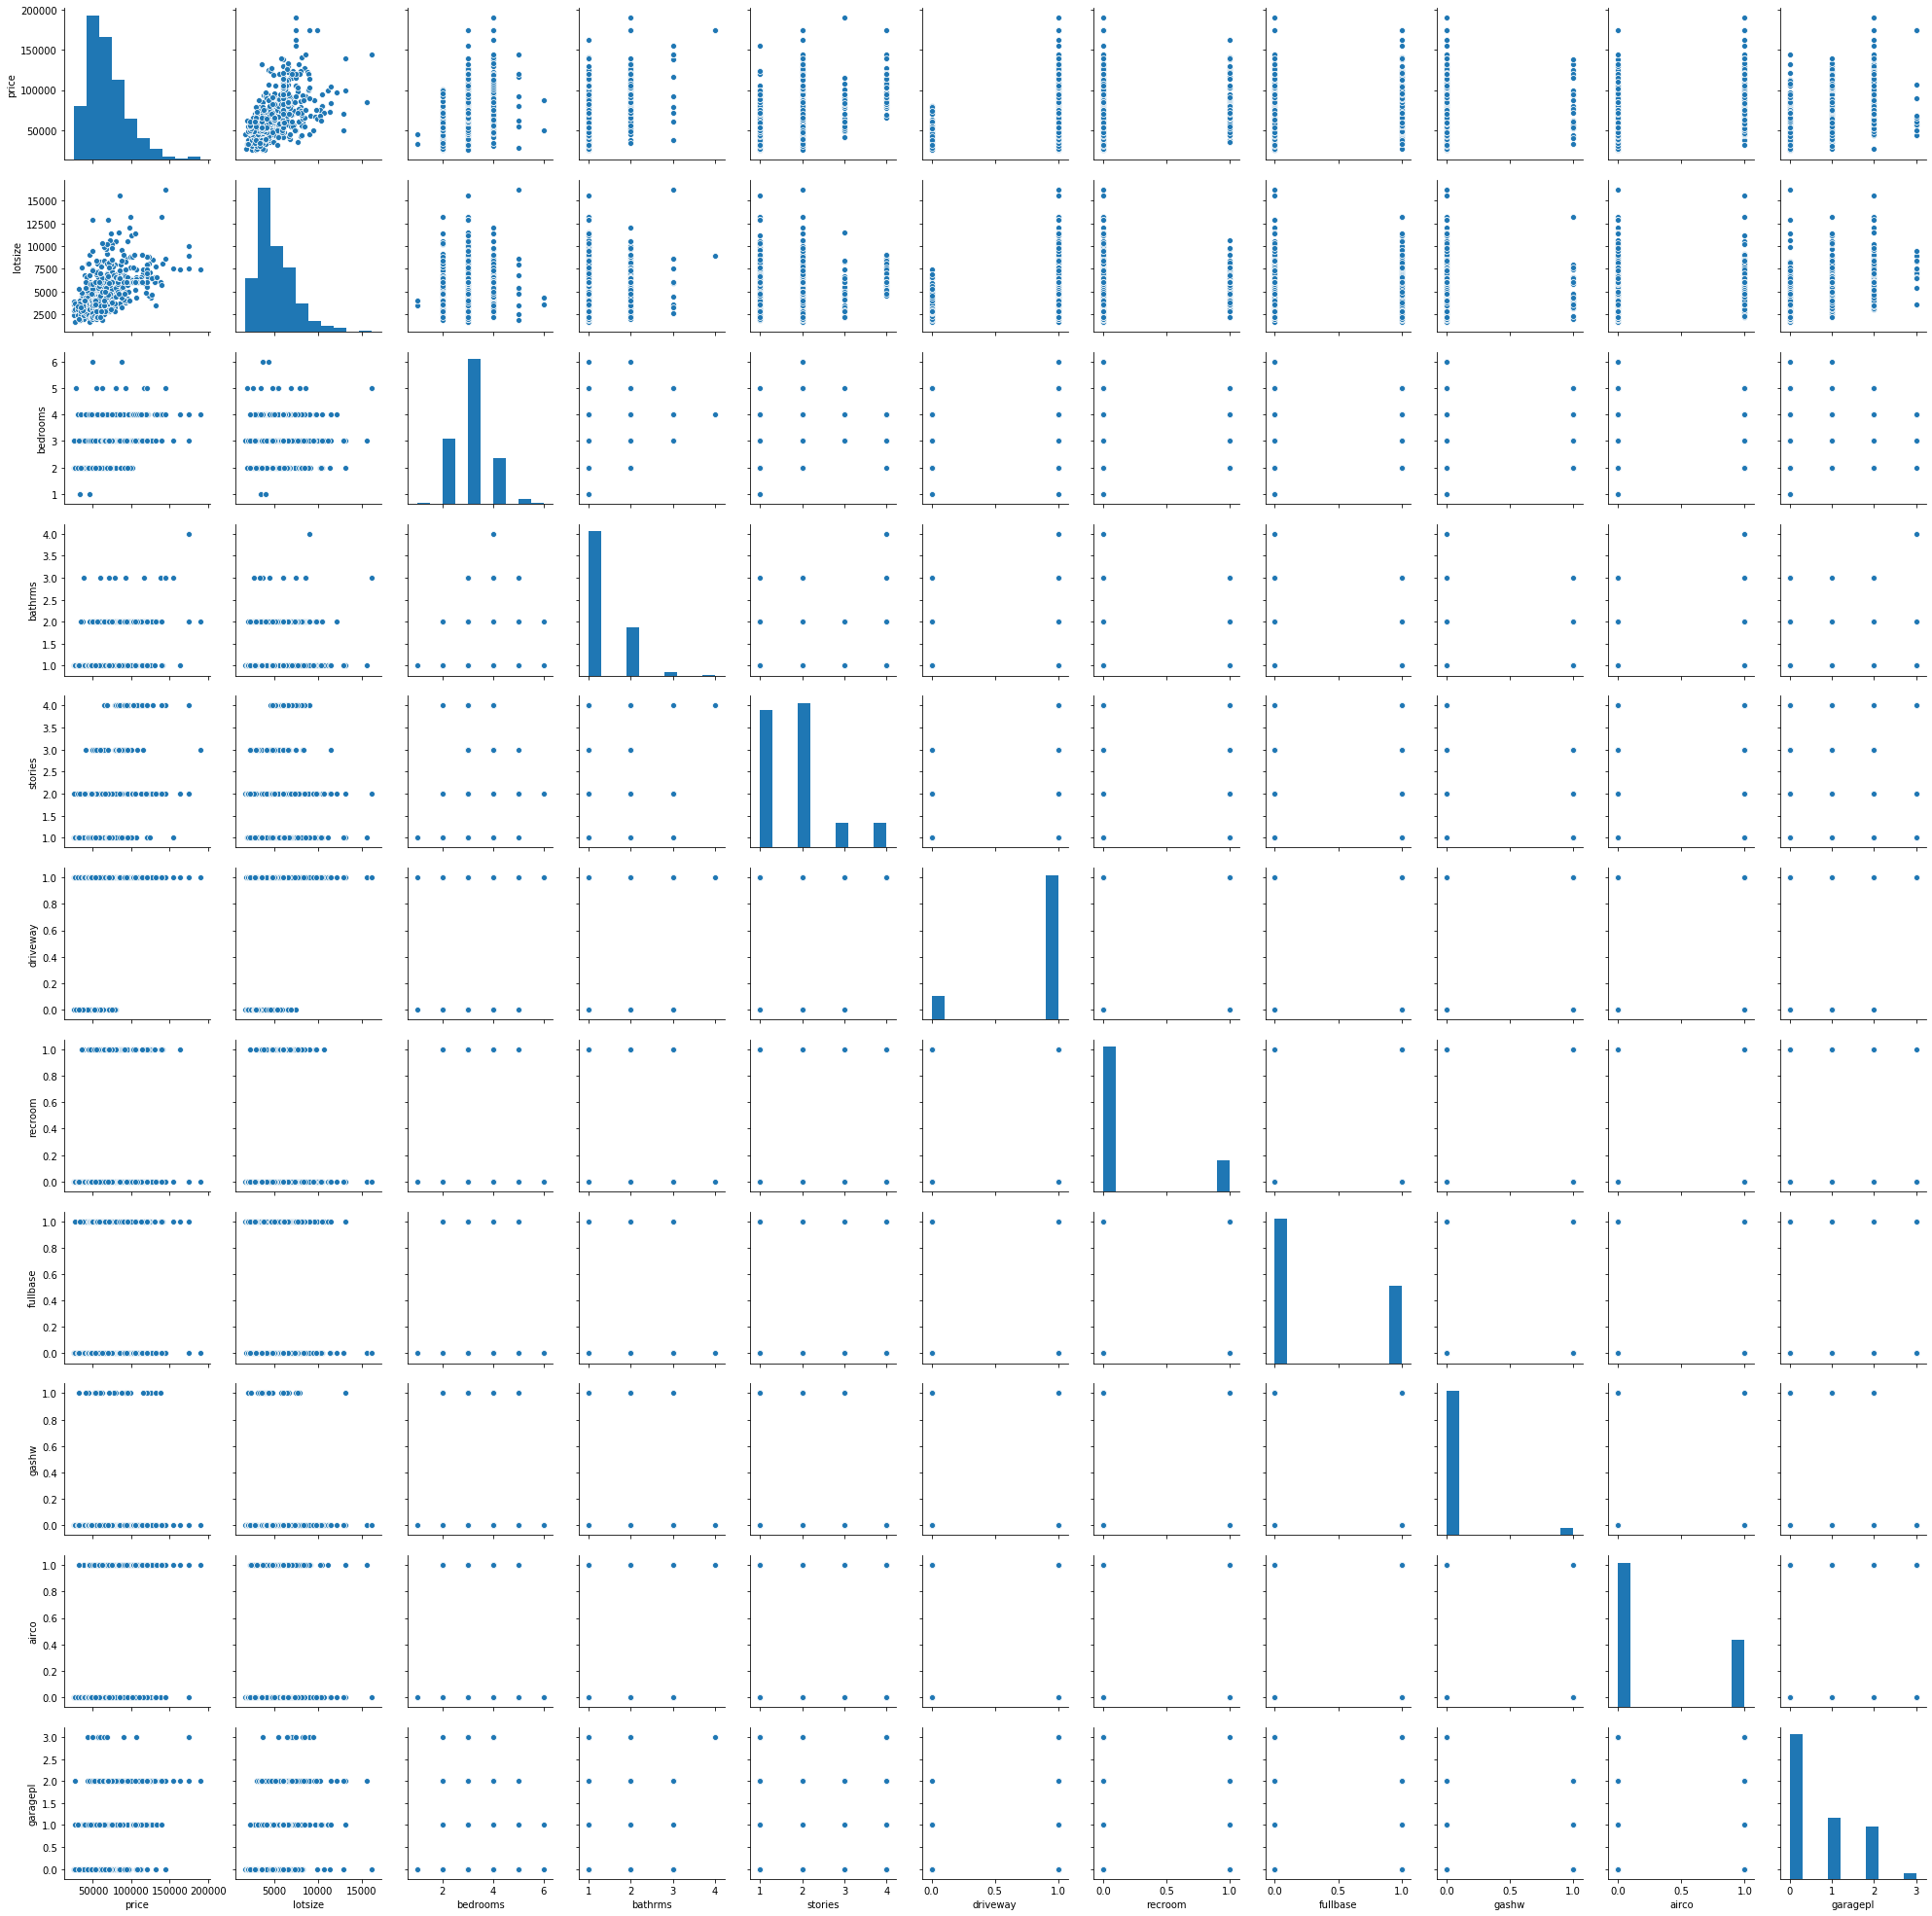

In [31]:
#to find the linear independent values
sns.pairplot(house0)

(array([ 73., 198., 118.,  88.,  39.,  15.,   8.,   5.,   0.,   2.]),
 array([ 1650.,  3105.,  4560.,  6015.,  7470.,  8925., 10380., 11835.,
        13290., 14745., 16200.]),
 <a list of 10 Patch objects>)

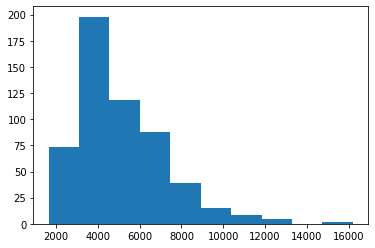

In [56]:
tmp=house0.iloc[:,1]
plt.hist(tmp)

In [57]:
house0['lotsize']=StandardScaler().fit_transform(house0.iloc[:,1:2])

In [58]:
house0.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl
0,42000.0,0.323028,3,1,2,1,0,1,0,0,1
1,38500.0,-0.531013,2,1,1,1,0,0,0,0,0
2,49500.0,-0.964958,3,1,1,1,0,0,0,0,0
3,60500.0,0.692343,3,1,2,1,1,0,0,0,0
4,61000.0,0.558466,2,1,1,1,0,0,0,0,0


In [59]:
y=house0.iloc[:,0]
x=house0.iloc[:,1:]

In [60]:
ts_score=[]
for j in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y , random_state =j,  test_size=0.05)
    lr = LinearRegression().fit(x_train, y_train)

    ts_score.append(lr.score(x_test, y_test))

K = ts_score.index(np.max(ts_score))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.05,random_state=K)
K

923

In [61]:
reg=LinearRegression()

In [62]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_pred=reg.predict(x_test)
y_pred

array([ 58744.49658602,  53512.46694562, 128814.7260867 ,  39571.82985011,
        57145.00459336, 110385.14575362,  49608.16539892,  85335.60313117,
        76125.57078094,  40389.23815766, 104402.57047107,  45799.64464551,
        90526.99990833,  90757.55724013,  43207.88670875,  56490.50739168,
        95593.137569  , 102320.24418953,  74270.52047853,  73224.38199938,
        40685.10448632,  55364.55987223,  56424.69694394,  39533.98286536,
        42708.76637373,  49604.20687897,  95982.7856611 ,  82576.01677699])

In [64]:
r2_score(y_pred,y_test)

0.8062266443853036

In [65]:
print("Mean Squared value =",mean_squared_error(y_test,y_pred))
print("Root Mean Squared value =",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared value = 121520789.13412978
Root Mean Squared value = 11023.646816463677
